<a href="https://colab.research.google.com/github/nishmatk/works/blob/master/visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


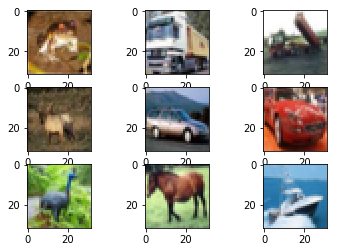

In [30]:
# example of loading the cifar10 dataset
from matplotlib import pyplot
from keras.datasets import cifar10
# load dataset
(trainX, trainy), (testX, testy) = cifar10.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])
# show the figure
pyplot.show()

In [31]:
from keras.utils import to_categorical
# load train and test dataset
#def load_dataset():
	# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
	# one hot encode target values
print (testY[4])
trainY = to_categorical(trainY)
testY = to_categorical(testY)
	#return trainX, trainY, testX, testY
print (testY[4])


[6]
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


In [0]:
#def prep_pixels(train, test):
	# convert from integers to floats
	trainX = trainX.astype('float32')
	testX = testX.astype('float32')
	# normalize to range 0-1
	trainX = trainX / 255.0
	testX = testX / 255.0
	# return normalized images
	#return train_norm, test_norm

In [33]:
# Create the model
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32,32,3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dropout(0.2))
model.add(Dense(1024, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu', kernel_constraint=maxnorm(3)))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
# Compile model
epochs = 25
lrate = 0.01
decay = lrate/epochs
sgd = SGD(lr=lrate, momentum=0.9, decay=decay, nesterov=False)
model.compile(loss='categorical_crossentropy', optimizer=sgd, metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_29 (Dropout)         (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_30 (Dropout)         (None, 16, 16, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 16, 16, 64)        36928     
__________

In [34]:
history=model.fit(trainX,trainY,validation_data=(testX,testY),epochs=25,batch_size=64)

Train on 50000 samples, validate on 10000 samples
Epoch 1/25
50000/50000 [==============================] - 12s 236us/step - loss: 1.9044 - acc: 0.2963 - val_loss: 1.7568 - val_acc: 0.3503
Epoch 2/25
50000/50000 [==============================] - 10s 210us/step - loss: 1.5098 - acc: 0.4498 - val_loss: 1.3751 - val_acc: 0.4970
Epoch 3/25
50000/50000 [==============================] - 11s 213us/step - loss: 1.3130 - acc: 0.5255 - val_loss: 1.2329 - val_acc: 0.5528
Epoch 4/25
50000/50000 [==============================] - 11s 211us/step - loss: 1.1965 - acc: 0.5688 - val_loss: 1.1018 - val_acc: 0.6033
Epoch 5/25
50000/50000 [==============================] - 11s 212us/step - loss: 1.0992 - acc: 0.6083 - val_loss: 1.0534 - val_acc: 0.6250
Epoch 6/25
50000/50000 [==============================] - 10s 209us/step - loss: 1.0198 - acc: 0.6355 - val_loss: 1.0708 - val_acc: 0.6270
Epoch 7/25
50000/50000 [==============================] - 11s 211us/step - loss: 0.9435 - acc: 0.6655 - val_loss: 0.

In [35]:

# evaluate model
acc = model.evaluate(testX, testY, verbose=0)
print(acc[1]*100)

78.46


In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png')

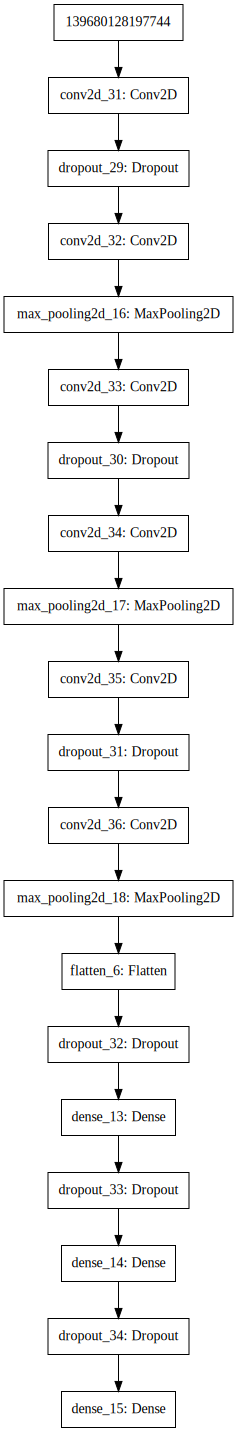

In [37]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))


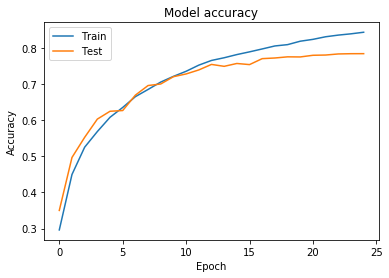

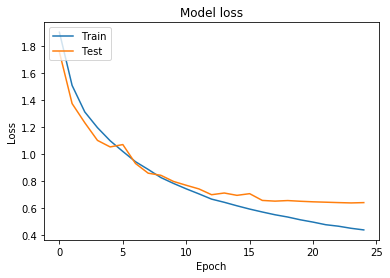

In [40]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt

#history = model.fit(trainX, trainY, validation_split=0.25, epochs=50, batch_size=16, verbose=1)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()